In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv (r'C:\Users\alehi\Downloads\NationalNames.csv')
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [4]:
#Виведіть перші 8 рядків набору даних.
df[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [5]:
#Вивести останні 8 рядків набору даних
df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [6]:
#Отримайте загальну інформацію про дані у наборі даних.
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [7]:
#Знайдіть кількість унікальних імен у наборі дани
uniqueValues = df['Name'].nunique()
print(uniqueValues)

93889


In [8]:
#Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних
g1 = df.groupby("Gender")
g1 = g1.agg({"Name": "nunique"})
g1 = g1.reset_index()
g1

,Gender,Name
0,F,64911
1,M,39199


In [9]:
#Знайдіть 5 найпопулярніших чоловічих імен у 2010 році
df.loc[(df['Gender'] == 'M') & (df['Year']==2010)][:5]

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [10]:
#Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)
df1=df.loc[(df['Count'] == df['Count'].max())]
print("The name is '",df1['Name'].values[0], "' in ",df1['Year'].values[0] )

The name is ' Linda ' in  1947


In [11]:
#Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
df2 = df.loc[(df['Count'] == df['Count'].min())]
df2.shape[0]

254615

In [12]:
#Підрахуйте кількість унікальних імен у кожному році
g1 = df. groupby("Year")
g1 = g1.agg({"Name": "nunique"})
g1 = g1.reset_index()
g1

,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


In [13]:
#Знайдіть рік із найбільшою кількістю унікальних імен
##g1 берется из прошлой ячейки
df2 = g1.loc[(g1['Name'] == g1['Name'].max())]
df2

,Year,Name
128,2008,32488


In [14]:
#Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
##df2 берется из прошлой ячейки
g1 = df.loc[(df['Year'] == df2['Year'].values[0])]
g2 = g1.loc[(g1['Count']==g1['Count'].max())][['Name']]
print("'",g2['Name'].values[0], "'")

' Jacob '


In [15]:
#Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
g1 = df.groupby(['Year','Gender'],as_index=False)[['Count']].sum()
g2=g1.loc[(g1['Gender']=='F')]
g3=g1.loc[(g1['Gender']=='M')]
res = pd.merge(g2, g3, on=['Year'], how='inner')
len(res.loc[(res['Count_x']>res['Count_y'])].index)

54

Text(0, 0.5, 'Total births per year')

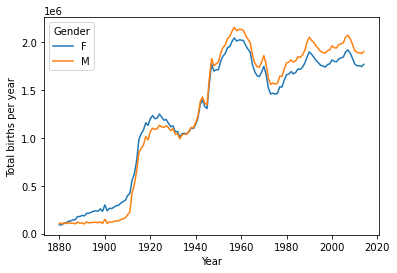

In [16]:
#Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.
g1 = df.groupby(['Year','Gender'],as_index=False)[['Count']].sum()
g2=g1.loc[(g1['Gender']=='F')]
g3=g1.loc[(g1['Gender']=='M')]
plt.plot(g2.Year,g2.Count)
plt.plot(g3.Year,g3.Count)
plt.legend(["F","M"],title="Gender")
plt.xlabel("Year")
plt.ylabel("Total births per year")

In [17]:
#Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)
F=df.loc[(df['Gender']=='F'),["Name","Gender"]]
M=df.loc[(df['Gender']=='M'),["Name","Gender"]]
res = pd.merge(F, M, on=['Name'], how='inner')
res['Name'].nunique()

10221

In [18]:
#Порахуйте, скільки разів хлопчиків називали Barbara
df.loc[((df['Name']=="Barbara")&(df['Gender']=='M'))][['Count']].sum()

Count    4139
dtype: int64

In [19]:
#Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)
F=df.loc[(df['Gender']=='F'),["Name","Year","Gender"]]
M=df.loc[(df['Gender']=='M'),["Name","Year","Gender"]]
res = pd.merge(F, M, on=['Name','Year'], how='inner')
res2=res.drop(labels=["Year","Gender_x","Gender_y"], axis=1)
res2['count'] = res2.groupby('Name')['Name'].transform('count')
res3=res2.loc[(res2['count']==135)].drop_duplicates()
res3=res3.reset_index()
res3.drop(labels=["index","count"], axis=1)

,Name
0,Jessie
1,Ollie
2,Marion
3,Jean
4,Francis
5,John
6,William
7,Lee
8,James
9,Sidney


Text(0, 0.5, 'Total births per year')

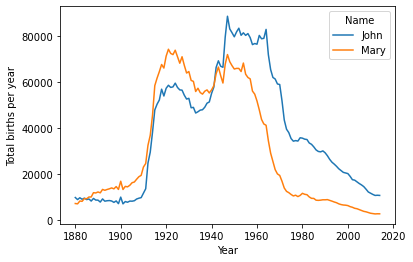

In [20]:
#Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.
g1 = df.groupby(['Year','Name'],as_index=False)[['Count']].sum()
g2=g1.loc[(g1['Name']=='John')]
g3=g1.loc[(g1['Name']=='Mary')]
plt.plot(g2.Year,g2.Count)
plt.plot(g3.Year,g3.Count)
plt.legend(["John","Mary"],title="Name")
plt.xlabel("Year")
plt.ylabel("Total births per year")

In [21]:
#Знайти найпопулярніші імена в кожному році
g1=df.groupby(['Year','Name','Gender'],as_index=False).agg({'Count':'sum'})
g1
g2=g1.groupby(['Year'],as_index=False)[['Count']].max()
g3=g1.groupby(['Year','Name'],as_index=False)[['Count']].max()
g3
res = pd.merge(g2, g3, on=['Count','Year'], how='inner')
res

,Year,Count,Name
0,1880,9655,John
1,1881,8769,John
2,1882,9557,John
3,1883,8894,John
4,1884,9388,John
...,...,...,...
130,2010,22883,Isabella
131,2011,21816,Sophia
132,2012,22267,Sophia
133,2013,21147,Sophia
